**<h1><center><center><center>BÀI TẬP COLAB SỐ 02 </center></h1>**
**<h1><center><center><center>RECOGNIZING HAND-WRITTEN DIGITS</center></h1>**
###LỚP: CS114.M11.KHCL
###NHÓM: DSE
1. Lê Đình Đức - *19521372*
2. Phan Anh Lộc - *19521766*
3. Lưu Anh Dũng - *19521392*

###Nguồn tham khảo:

1. Recognizing hand-written digits - [LINK](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py)

This example shows how scikit-learn can be used to recognize images of hand-written digits, from 0-9.

In [ ]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

Automatically created module for IPython interactive environment


#Digits dataset

Tập dữ liệu chữ số bao gồm hình ảnh của các chữ số có độ phân giải là 8x8 pixel. Thuộc tính hình ảnh của tập dữ liệu là một mảng có kích thước 8x8 thể hiện thang độ xám của mỗi hình. Chúng ta sẽ sử dụng các mảng này để hình dung 4 hình ảnh đầu tiên. Thuộc tính target của tập dữ liệu lưu trữ chữ số mà mỗi hình ảnh đại diện và điều này được bao gồm trong tiêu đề của 4 ô bên dưới.

Lưu ý: nếu ta làm việc với tệp hình ảnh (ví dụ: tệp ‘png '), sử dụng matplotlib.pyplot.imread để tải hình ảnh.

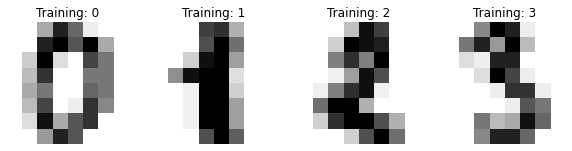

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

# Classification
Để tiến hành phân loại trên bộ dữ liệu này, ta cần "làm phẳng" các hình ảnh, chuyển từng mảng 2 chiều các giá trị thang độ xám từ kích thước là (8, 8) sang kích thước (64,). Sau đó, toàn bộ tập dữ liệu sẽ có dạng là (n_samples, n_features).
+ n_samples là số lượng hình ảnh
+ n_features là tổng số pixels của mỗi hình ảnh

In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

Để dễ hình dung hơn ta hiển thị giá trị chữ số và dự đoán chúng trên tiêu đề đối với 4 chữ số đầu tiên của tập dữ liệu test

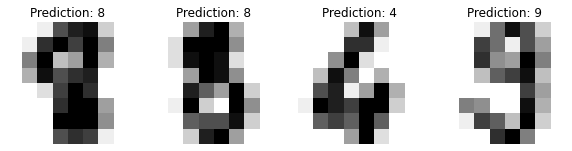

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

Module metrics.classification_report đánh giá tập train qua các chỉ số phân loại chính (precison, recall, f1-score, support)

In [ ]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




Trực quan nó với Confusion Matrix.

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


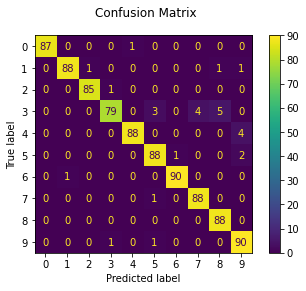

In [ ]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

# Capture Camera

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo_1.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo_1.jpg


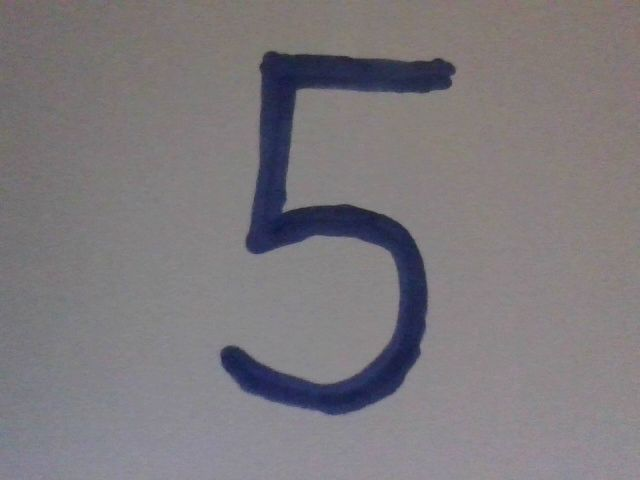

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# Crop ảnh

Mục đích: Để hạn chế mất mát dữ liệu nhất trong quá trình resize ảnh về kích thước 8x8 dẫn đến kết quả dự đoán sai => crop hình dựa vào pixel của các màu trắng & đen

In [ ]:
#hàm cắt hình ảnh, loại bỏ tối đa nền trắng
def crop_img(inImg):
  inImg = 255 - inImg[:, :]

  maxUp = inImg.shape[0]//2
  maxDown = inImg.shape[0]//2
  maxLeft = inImg.shape[1]//2
  maxRight = inImg.shape[1]//2

  for i in range(inImg.shape[0]):
    for j in range(inImg.shape[1]):
      if inImg[i][j] > 160:
        if maxUp >= i: maxUp = i
        if maxDown <= i: maxDown = i
        if maxLeft >= j: maxLeft = j
        if maxRight <= j: maxRight = j

  editedImg = inImg[maxUp:maxDown+1, maxLeft:maxRight+1] 
  return editedImg

# Xử lí ảnh về trắng đen + resize ảnh

Gray image: 


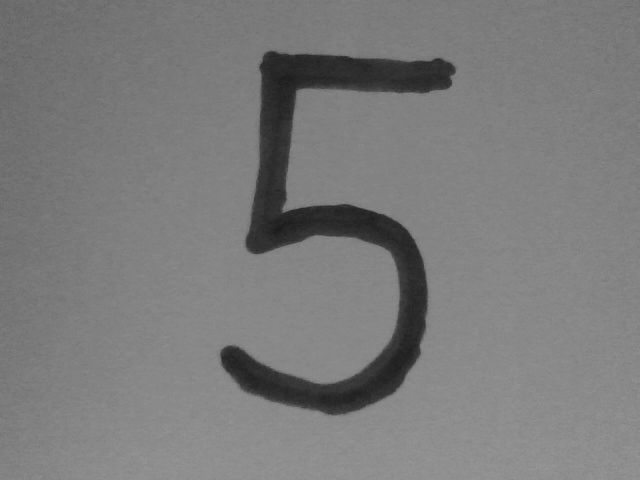

Croppped image: 


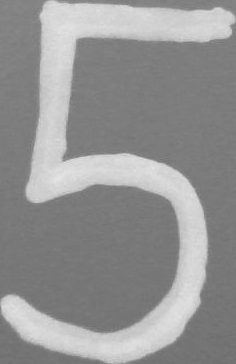

Resized image: 


array([[130, 206, 217, 213, 209, 207, 205, 208],
       [129, 203, 144, 130, 124, 124, 125, 125],
       [125, 200, 128, 125, 121, 126, 124, 125],
       [125, 208, 201, 213, 220, 121, 124, 121],
       [119, 121, 120, 124, 123, 122, 214, 120],
       [120, 121, 118, 120, 120, 120, 212, 120],
       [174, 117, 119, 118, 121, 121, 219, 114],
       [118, 205, 210, 204, 219, 206, 115, 117]], dtype=uint8)

In [ ]:
path_img = "/content/photo_1.jpg" 

gray_image = cv2.imread(path_img, 0) 
print('Gray image: ')
cv2_imshow(gray_image)

croppedImg = crop_img(gray_image)
print('Croppped image: ')
cv2_imshow(croppedImg)

resizedImg =  cv2.resize(croppedImg,(8,8))
print('Resized image: ')
resizedImg

# Predict

Text(0.5, 1.0, 'Prediction: [5]')

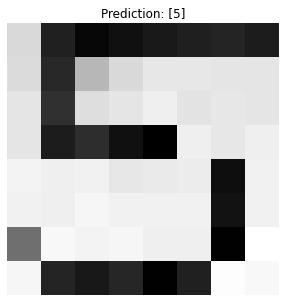

In [ ]:
input_data = resizedImg/16
predict_input_data = clf.predict(input_data.reshape(1,64))
_, ax = plt.subplots(figsize=(5,5))
ax.set_axis_off()
image = resizedImg
ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
ax.set_title(f'Prediction: {predict_input_data}')

# Load ảnh từ drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os

path_test = '/content/drive/MyDrive/CS114/Test/'
data_test = os.listdir(path=path_test)

#đếm số lượng của hình ảnh có trong tập dữ liệu
n_tests = len(data_test)
print ("Số lượng ảnh:", n_tests)

#tiến hành vòng lặp chạy qua từng hình ảnh để xử lý và dự đoán hình sử dụng model nhận diện chữ số viết tay của sklearn
for i in range(n_tests):
  __path = path_test + data_test[i]
 
 #truy xuất vào hình ảnh gốc
  _, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 10))
  ax_ori = axes[0]
  original = cv2.imread(__path)
  ax_ori.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB), interpolation='nearest')
  ax_ori.set_title(f'Ảnh gốc')

 #truy xuất hình ảnh sau khi xử lý sang màu đen trắng
  ax_ori = axes[1]
  gray_original = cv2.imread(__path,0)
  ax_ori.imshow(gray_original, cmap=plt.cm.gray_r, interpolation='nearest')
  ax_ori.set_title(f'Ảnh đen trắng')

 #cắt hình ảnh từ hình ảnh trắng đen theo quy tắc loại bỏ các pixels trắng ở mức tối thiểu, chỉ để tâm đến các pixels đen ở hàm crop_img ở trên
  ax_ori = axes[2]
  crop_original = crop_img(gray_original)
  ax_ori.imshow(crop_original, cmap=plt.cm.gray_r, interpolation='nearest')
  ax_ori.set_title(f'Ảnh sau khi crop')
  
 #scale hình về tỉ lệ [0,16] và resize hình về size (8,8) pixels
  ax_ori = axes[3]
  resized_img = cv2.resize(crop_original,(8,8))
  scaled_img = resized_img/16
  predicted_our_datas = clf.predict(scaled_img.reshape(1,64))
  ax_ori.imshow(resized_img, cmap=plt.cm.gray_r, interpolation='nearest')
  ax_ori.set_title(f'Prediction:{predicted_our_datas}')

Output hidden; open in https://colab.research.google.com to view.

Nhận xét:
- Kết quả chạy thực tế **không tốt**, kết quả trả về độ chính xác rất thấp (6/30)
- Kết quả không tốt vì kết quả dự đoán chính xác quá thấp (20%), số trường hợp đúng thường rơi vào trường hợp được ghi bằng bút lông có nét đậm
- Kết quả không tốt có thể là do nét chữ bút bi nếu không đủ đậm thì khi resize ảnh sẽ không được tốt, camera không tốt làm ảnh khong được nét và bộ dữ liệu train không được tốt
